# G2M Insight for Cab Investment Firm

### Summary:
**The Client**

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

The outcome of this analysis will be a presentation to visualize the findings to XYZ’s Executive team. 

The idea is to create a hypothesis, engage with the data, think critically, and use various analytical approaches to produce unique insights.

We encourage you to find third party data sets which correspond to the overall theme and geographical properties of the data provided.  For Example: you can leverage US holiday data/ weather data

Also, do research on overall cab industry in US and try to relate that with the trend in data

**The overall business goal is to find out which company XYZ firm should invest in. The following hypothesis are formulated to uncover important insights that the firm might want to know about both companies in relation to the business goal.**

### EDA Goals:
* Visualize the annual profit and customer activity trend together in a line graph for each cab company.
* Visualize profit & activity trends with seasonality by graphing the **months** (x-axis) with profit and # of transaction (y-axis).
* Visualize profit & activity trends on a weekly basis.
* Observe the profit distrubution when compared with the distance traveled.
* Observe the profit 


### Hypothesis:

1) In colder seasons, one company will outperform the other.

2) The most profitable company will outperform the other company in slower times of the year.

3) The most profitable company will have more transaction.

4) The most profitable company will have higher income customers.

5) The company with higher KM Traveled on average will generate more profit.

6) Younger customers will contribute more towards profit.

7) The company with the highest profit margin will have more repeat customers.

## 1. Open and read the data files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats as st
import warnings

In [2]:
cab = pd.read_csv("Cab_Data.csv")
city = pd.read_csv("City.csv")
customer = pd.read_csv("Customer_ID.csv")
trans = pd.read_csv("Transaction_ID.csv")

display(cab.head(),
      city.head(),
      customer.head(),
      trans.head())

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [3]:
display(cab.info(),
        city.info(),
        customer.info(),
        trans.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0

None

None

None

None

#### 1.1 Impressions on the Initial Data

1) Data was loaded and successfully been read.

2) Data must now be processed and analyzed for duplicates, missing values, and outliers.

## 2. Data Cleaning & Optimization

#### **Preprocessing**

* Create missing value reports for dataframes.
* Drop duplicate rows.
* Find and remove outliers.

#### **Feature Engineering**

*New featues can be derived from initial dataframes:*

**cab:**
* Profit Margin: Price Charged - Cost of Trip (cab)
* Change Date from general to datettime format (cab)
* Add Month column (cab)
* Add a "cold", "warm", "hot", month column

**trans:**
* Create a # of transactions per unique customer column (trans df)

**customer:**
* Categorize Income column (customer)

#### **Master Dataframe**
* Merge all dataframes, except city, to create one dataframe to explore the data with
* Drop the transaction column



### **Preprocessing:**
#### Missing Values

In [4]:
#Preparing missing values report
dataframes = [cab, city, customer, trans]

def mvr(df):
  df.isna().mean() * 100

  report = df.isna().sum().to_frame()
  report = report.rename(columns = {0: 'missing_values'})
  report['% of total'] = (report['missing_values'] / df.shape[0]).round(2)
  report.sort_values(by = 'missing_values', ascending = False)
  return report

for i in dataframes:
  display(mvr(i))

,missing_values,% of total
Transaction ID,0,0.0
Date of Travel,0,0.0
Company,0,0.0
City,0,0.0
KM Travelled,0,0.0
Price Charged,0,0.0
Cost of Trip,0,0.0


,missing_values,% of total
City,0,0.0
Population,0,0.0
Users,0,0.0


,missing_values,% of total
Customer ID,0,0.0
Gender,0,0.0
Age,0,0.0
Income (USD/Month),0,0.0


,missing_values,% of total
Transaction ID,0,0.0
Customer ID,0,0.0
Payment_Mode,0,0.0


In [5]:
#Lowercase all column names
for i in dataframes:
  i.columns = map(str.lower, i.columns)

cab = cab.rename({'transaction id': 'transaction', 'date of travel': 'date', 'km travelled': 'km_travelled',
                  'price charged': 'price', 'cost of trip': 'cost'}, axis=1)

customer = customer.rename({'customer id': 'customer', 'income (usd/month)': 'income_usd_monthly'}, axis=1)

trans = trans.rename({'transaction id': 'transaction', 'customer id': 'customer'}, axis=1)

display(cab.info(),
        city.info(),
        customer.info(),
        trans.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   transaction   359392 non-null  int64  
 1   date          359392 non-null  object 
 2   company       359392 non-null  object 
 3   city          359392 non-null  object 
 4   km_travelled  359392 non-null  float64
 5   price         359392 non-null  float64
 6   cost          359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   city        20 non-null     object
 1   population  20 non-null     object
 2   users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data col

None

None

None

None

### Duplicates

In [6]:
display(cab['transaction'].duplicated().value_counts(),
        customer['customer'].duplicated().value_counts(),
        trans['transaction'].duplicated().value_counts())


False    359392
Name: transaction, dtype: int64

False    49171
Name: customer, dtype: int64

False    440098
Name: transaction, dtype: int64

No duplicates were detected.

### **Feature Engineering**



In [7]:
#Profit Margin: Price Charged - Cost of Trip
cab['profit'] = cab['price'] - cab['cost']
cab['profit'].describe()

count    359392.000000
mean        137.253198
std         160.311840
min        -220.060000
25%          28.012000
50%          81.962000
75%         190.030000
max        1463.966000
Name: profit, dtype: float64

There appears to be negative values for profit. We can visualize these values

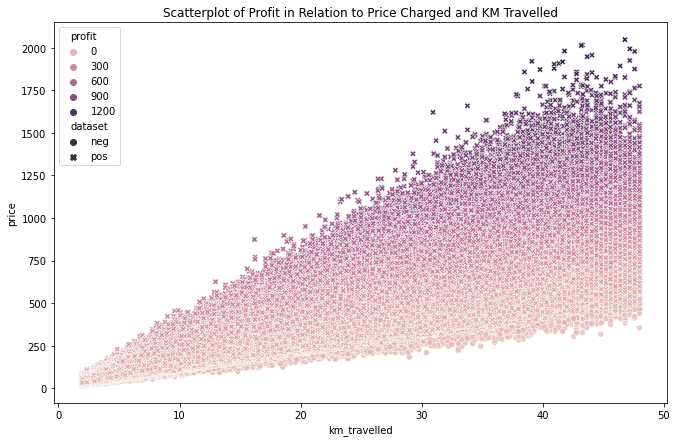

In [8]:
neg_profit = cab[cab['profit'] <= 0]
pos_profit = cab[cab['profit'] > 0]

concatenated = pd.concat([neg_profit.assign(dataset='neg'), 
                          pos_profit.assign(dataset='pos')]) #inputting two datasets for scatterplot data

plt.figure(figsize = (11,7))
plt.title('Scatterplot of Profit in Relation to Price Charged and KM Travelled')

p = sns.scatterplot(x='km_travelled', y='price', data=concatenated,
                hue='profit', style='dataset')

warnings.simplefilter('always', category=UserWarning) #omitting UserWarning

plt.show()

#### Fig 2.1 Scatterplot of Profit in Relation to KM Travelled and Price Charged

1) The graph shows that the all the negative profit (circles) follow a consistant linear relationship with the price charged.

2) This indicates that the prices may have been set at a lower price than normal purposefully to promote growth of the business.

3) Therefore, the relationship of the negative profit is the result of discounted rides

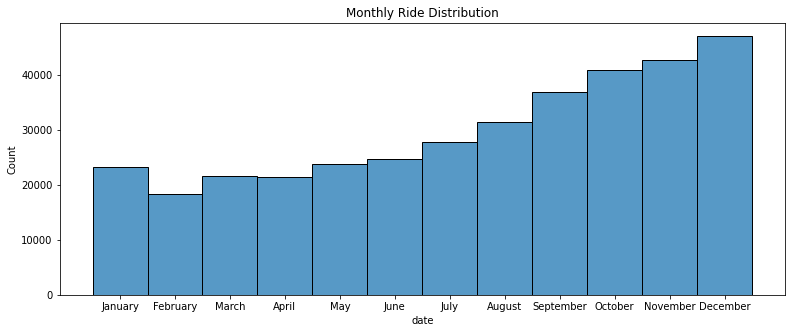

In [9]:
#Change Date of Travel from general to datettime format (cab)
cab['date'] = pd.to_datetime(cab['date']) 

#Creating a month column
cab['month'] = cab['date'].dt.month
cab['year'] = cab['date'].dt.year

result = cab['date'].dt.month_name()

plt.figure(figsize = (13,5))
plt.title('Monthly Ride Distribution')

sns.histplot(data=result)

#### Fig 2.2 Monthly Ride Distribution via Histogram

1) The figure shows that many rides occur during the colder months, especially during holiday season.

2) The amount of rides tends gradually increases from the beginning of the year.

3) XYZ firm may want to keep this seasonality in account when deciding to invest more into a cab company.

### **Master Dataframe**
* Merge all dataframes, except city, to create one dataframe to explore the data with
* Drop the transaction column

In [10]:
display(trans.info(),
        customer.info(),
        cab.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   transaction   440098 non-null  int64 
 1   customer      440098 non-null  int64 
 2   payment_mode  440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer            49171 non-null  int64 
 1   gender              49171 non-null  object
 2   age                 49171 non-null  int64 
 3   income_usd_monthly  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------     

None

None

None

In [11]:
df = cab.merge(trans, on='transaction', how='inner').merge(customer, how='inner')

df

,transaction,date,company,city,km_travelled,price,cost,profit,month,year,customer,payment_mode,gender,age,income_usd_monthly
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,1,2016,29290,Card,Male,28,10813
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,7,2018,29290,Cash,Male,28,10813
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,11,2018,29290,Card,Male,28,10813
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,1,2016,27703,Card,Male,27,9237
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,4,2018,27703,Card,Male,27,9237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,2018-01-07,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,47.2656,1,2018,38520,Card,Female,42,19417
359388,10439799,2018-01-03,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,105.0980,1,2018,12490,Cash,Male,33,18713
359389,10439838,2018-01-04,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,71.2100,1,2018,41414,Card,Male,38,3960
359390,10439840,2018-01-06,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,21.8600,1,2018,41677,Cash,Male,23,19454


In [12]:
display(df.duplicated().value_counts(),
        mvr(df))

False    359392
dtype: int64

,missing_values,% of total
transaction,0,0.0
date,0,0.0
company,0,0.0
city,0,0.0
km_travelled,0,0.0
price,0,0.0
cost,0,0.0
profit,0,0.0
month,0,0.0
year,0,0.0


### Categorizing Income

The following numbers will be divided by 12 to represent monthly low, medium, and high income: 100,000, 200,000, 200,000+. 

In [13]:
#Categorizing income
def income_assign(income):
    if income <= 8333:
        return 'low income'
    if income <= 16666:
        return 'medium income'
    else:
        return 'high income'
df['income_level'] = df['income_usd_monthly'].apply(income_assign)
df['income_level'].value_counts()

high income      151785
medium income    118973
low income        88634
Name: income_level, dtype: int64

### Outliers

The columns that make the most sense to process outliers in are:
* Income (customer)
* 'price', 'cost', 'km_travelled'  (cab)

1) Initial distribution will be analyzed via boxplot.

2) Outliers will be removed.

3) Distributions will be re-analyzed.

In [14]:
#Mean, min, max, std
columns =  df[['price', 'cost', 'km_travelled']]
columns.describe()

,price,cost,km_travelled
count,359392.000000,359392.000000,359392.000000
mean,423.443311,286.190113,22.567254
std,274.378911,157.993661,12.233526
min,15.600000,19.000000,1.900000
25%,206.437500,151.200000,12.000000
50%,386.360000,282.480000,22.440000
75%,583.660000,413.683200,32.960000
max,2048.030000,691.200000,48.000000


<function matplotlib.pyplot.show(*args, **kw)>

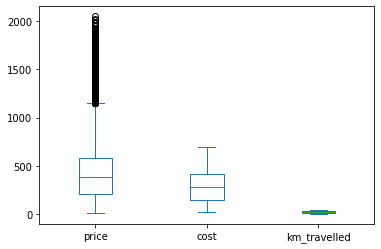

In [15]:
#Plotting initial distribution
columns.plot.box(by=None)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

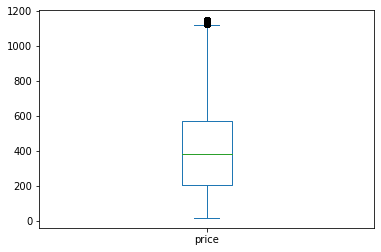

In [16]:
def drop_outliers(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3 - Q1
  
  df_outliers = df[((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))] #saving outliers to separate dataframe
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))] #excluding the outliers
  return df

df['price'] = drop_outliers(df['price'].astype(int)) #applying function

df['price'].plot.box(by=None)
plt.show
  

In [17]:
df['price'].describe()

count    353421.000000
mean        408.271220
std         251.610858
min          15.000000
25%         203.000000
50%         380.000000
75%         571.000000
max        1148.000000
Name: price, dtype: float64

In [18]:
#Finding the percent missing after outliers have been removed
Percent_Missing_Data = 100 - ((353421/359392) * 100)
Percent_Missing_Data

1.661417059923437

#### Conclusion 2.1 Master Dataframe, Feature Engineering, Outliers

1) The master dataframe has been created. This dataframe can be used to create a model for profit forecasting. For visualization purposes, separate df's will be made to explore the differences between cab companies.

2) Features have ben synthesized, such as profit and income categorization.

3) Outliers based on price have been removed.

## 3. EDA:


#### Visualize annual profit and customer activity for each company

First create dataframes for each year with respective company:
* 3 yellow cab dfs
* 3 pink cab dfs

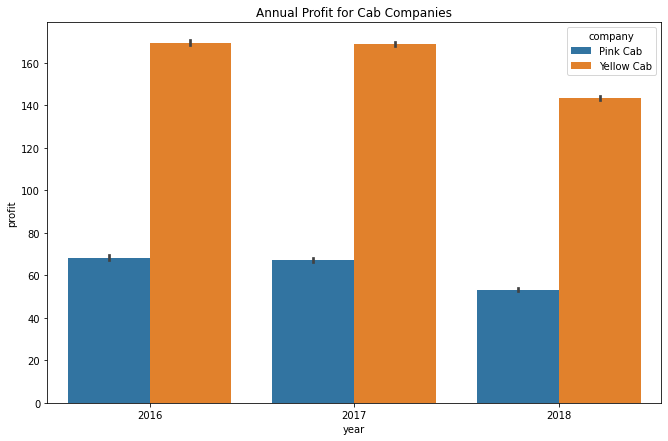

In [19]:
#creating dfs for each year
y_2016 = df[df['year'] == 2016] #| (df['company'] == 'Yellow Cab')] 
y_2017 = df[df['year'] == 2017] #| (df['company'] == 'Yellow Cab')]
y_2018 = df[df['year'] == 2018] #| (df['company'] == 'Yellow Cab')]

concatenated = pd.concat([y_2016.assign(dataset='2016'), 
                          y_2017.assign(dataset='2017'),
                          y_2018.assign(dataset='2018')]) #inputting three datasets, one for each year


plt.figure(figsize = (11,7))
plt.title('Annual Profit for Cab Companies')

p = sns.barplot(x='year', y='profit', data=concatenated,
                hue='company')

warnings.simplefilter('always', category=UserWarning) #omitting UserWarning

plt.show()

#### Fig 3.1 Annual Profit for Cab Companies

1) The graph shows that years 2016 and 2017 performed very similarly while in 2018, both companies decreased in profit.

2) While there is a trending decrease, the Yellow Cab company still outperforms the Pink Cab company.

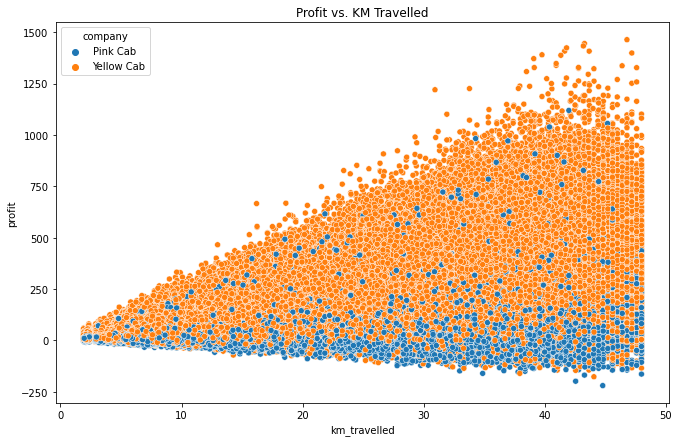

In [20]:
plt.figure(figsize = (11,7))
plt.title('Profit vs. KM Travelled')

p = sns.scatterplot(x='km_travelled', y='profit', data=df,
                hue='company')

warnings.simplefilter('always', category=UserWarning) #omitting UserWarning

plt.show()

#### Fig 3.2 Profit vs. KM Travelled

1) Yellow Cab is shown to have more profit per km_travelled compared to Pink Cab.

2) As the distance of travel increases, Yellow Cab profits tend to increase while Pink Cab profits stay the same at a lower level.

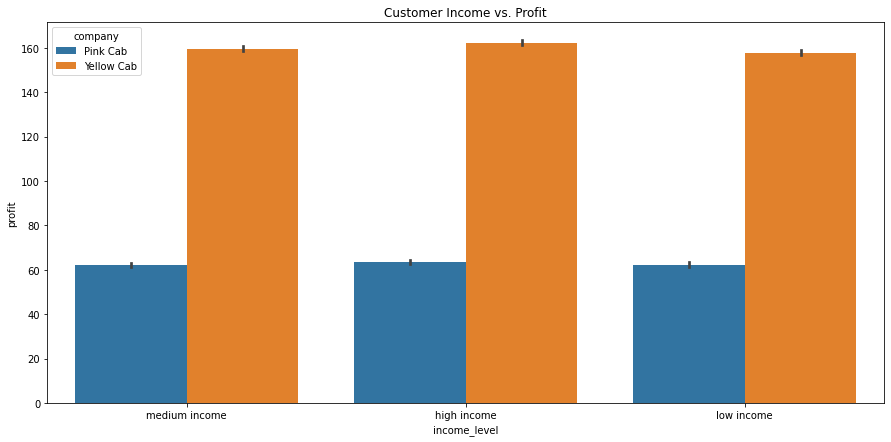

In [21]:
plt.figure(figsize = (15,7))
plt.title('Customer Income vs. Profit')

y = sns.barplot(x='income_level', y='profit', data=df, 
                hue='company')

warnings.simplefilter('always', category=UserWarning) #omitting UserWarning

plt.show()

#### Fig 3.3 Customer Income vs. Profit 

1) While customer income ranges very widely, all income groups contributed similarly towards the profits of both companies.

2) Yellow Cab still has an advantage over Pink Cab in terms of income demographic.

## Statistical Data Analysis:

Null Hypothesis: The differences between cab companies profit margin is not significant.

Alt Hypothesis: The differences between cab companies profit margin is significant.

In [23]:
yellow = df[df['company'] == 'Yellow Cab']
yellow = yellow['profit']
pink = df[df['company'] == 'Pink Cab']
pink = pink['profit']

alpha = 0.05

results = st.ttest_ind(yellow, pink)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis") 

p-value:  0.0
We reject the null hypothesis
